In [1]:
import os
os.getcwd()
os.chdir('/home/chtung/project_MC')

import numpy as np
import time
from tqdm import tqdm, trange
from WLM import WLChain
import matplotlib
import matplotlib.pyplot as plt
from scipy.io import savemat, loadmat

<Figure size 1152x1152 with 0 Axes>

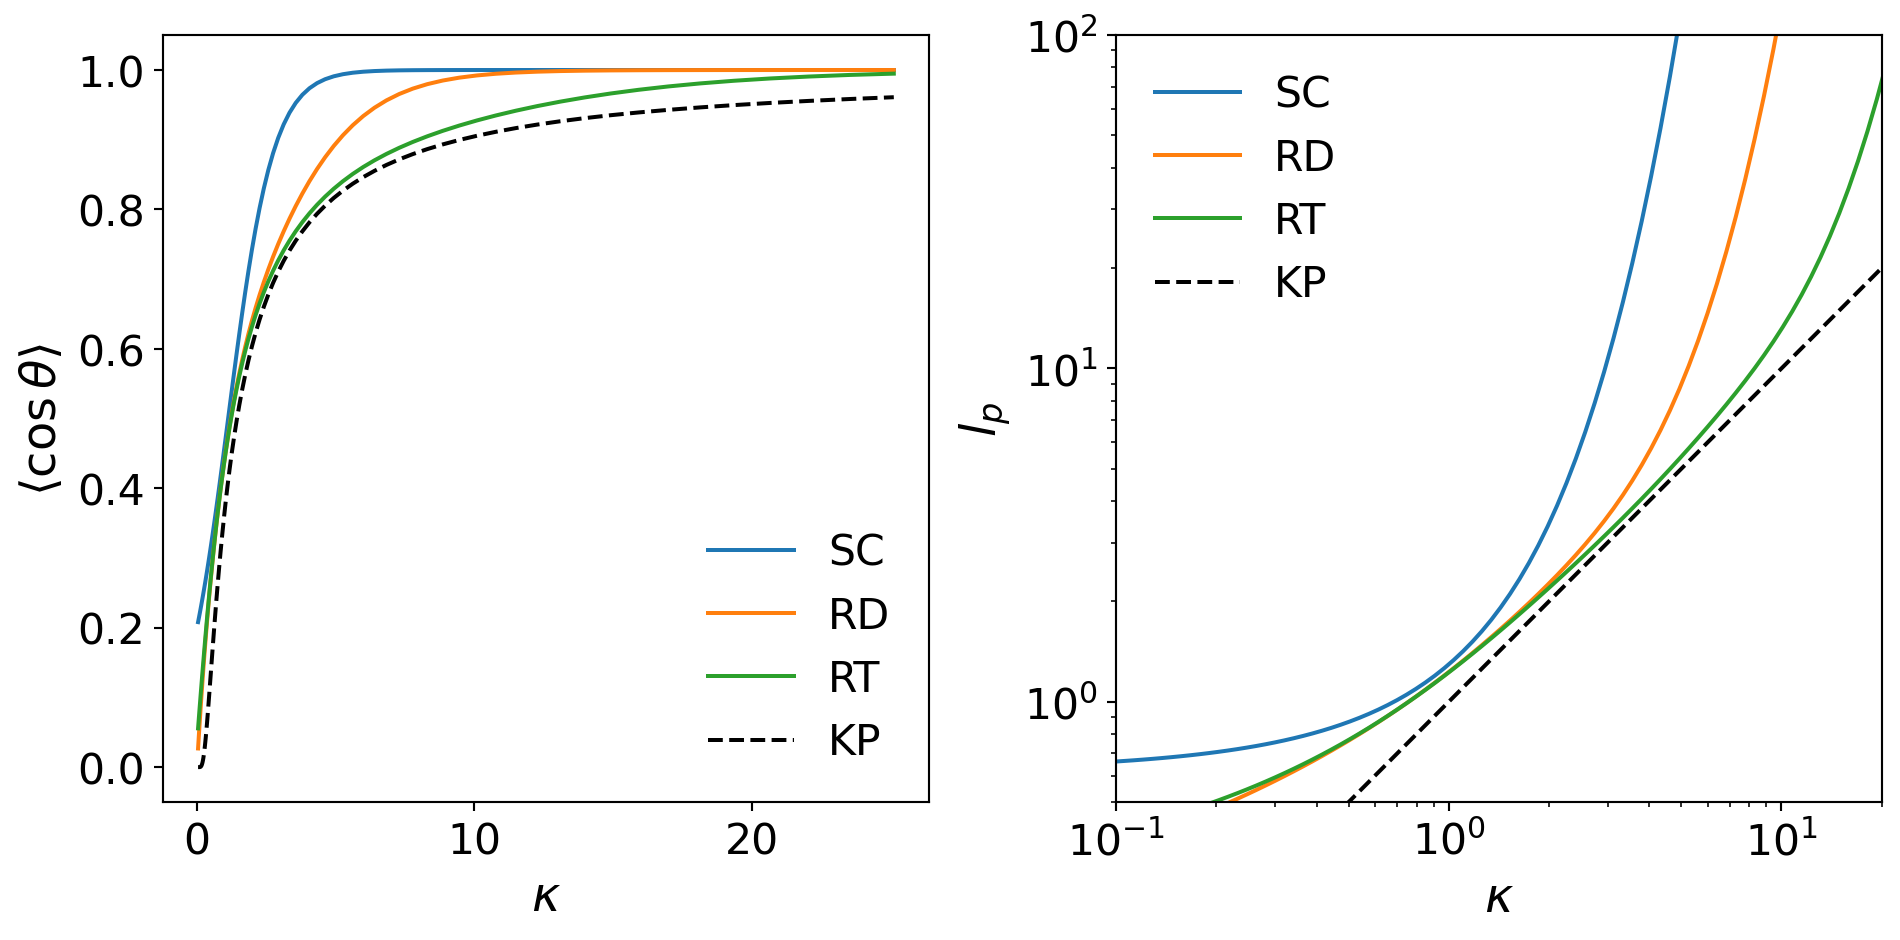

In [78]:
## provide lp/lb, evaluate the required kappa
from f_chain import grid_coords
fig = plt.figure(figsize=(10, 5),dpi=192)

ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
labels = ['SC','RD','RT']
for i, grid in enumerate(['SC','RB','RT']):
    r_n, r_opp = grid_coords(grid)
    cos_i1 = r_n@r_n[0].T
    theta_i1 = np.arccos(cos_i1)

    def f_average(x, kappa):
        # x(theta) is a fumction of theta
        x_ave = np.sum(x*np.exp(-kappa/2*theta_i1**2))/np.sum(np.exp(-kappa/2*theta_i1**2))
        return x_ave

    def f_average_nonrev(x, kappa):
        # x(theta) is a fumction of theta
        x_ave = np.sum((x*np.exp(-kappa/2*theta_i1**2))[cos_i1>-1])/np.sum(np.exp(-kappa/2*theta_i1**2)[cos_i1>-1])
        return x_ave

    kappa_list = np.logspace(-1.4,1.4,100)
    cos_ave = np.array([f_average_nonrev(cos_i1, k) for k in kappa_list])
    lp_ave = -1/np.log(cos_ave)

    ax1.plot(kappa_list, cos_ave, label = labels[i])
    
    ax1.set_xlabel(r'$\kappa$',fontsize=18)
    ax1.set_ylabel(r'$\langle \cos\theta \rangle$',fontsize=18)
    ax1.tick_params(axis='both', which='major', labelsize=16)

    ax2.plot(kappa_list, lp_ave, label = labels[i])
    
    ax2.set_xlabel(r'$\kappa$',fontsize=18)
    ax2.set_ylabel(r'$l_p$',fontsize=18)
    ax2.set_yscale('log')
    ax2.set_xscale('log')
    ax2.set_ylim([0.5,100])
    ax2.set_xlim([0.1,20])
    ax2.tick_params(axis='both', which='major', labelsize=16)

ax1.plot(kappa_list, np.exp(-1/kappa_list), '--k', label = 'KP')
ax1.legend(fontsize=16, frameon=False)

ax2.plot(kappa_list, kappa_list, '--k', label = 'KP')
ax2.legend(fontsize=16, frameon=False)

plt.tight_layout()

$l_p = \kappa$ for $l_p\approx 1$

In [84]:
from scipy import interpolate
def kappa_eff(l_p, grid, nonreverse=True):
    r_n, r_opp = grid_coords(grid)
    cos_i1 = r_n@r_n[0].T
    theta_i1 = np.arccos(cos_i1)

    def f_average(x, kappa):
        # x(theta) is a fumction of theta
        x_ave = np.sum(x*np.exp(-kappa/2*theta_i1**2))/np.sum(np.exp(-kappa/2*theta_i1**2))
        return x_ave

    def f_average_nonrev(x, kappa):
        # x(theta) is a fumction of theta
        x_ave = np.sum((x*np.exp(-kappa/2*theta_i1**2))[cos_i1>-1])/np.sum(np.exp(-kappa/2*theta_i1**2)[cos_i1>-1])
        return x_ave
    
    # get the relation between bending energy and chain persistence
    kappa_list = np.logspace(-2,2,200)
    if nonreverse:
        f_ave = f_average_nonrev
    else:
        f_ave = f_average

    cos_ave = np.array([f_ave(cos_i1, k) for k in kappa_list])
    sigma = 0
    lp_ave_list = -1/(np.log(cos_ave))

    # obtain the corresponding kappa_eff from interpolation
    i_finite = np.isfinite(lp_ave_list)
    # f_interp = interpolate.PchipInterpolator(lp_ave_list, kappa_list)
    # kap_eff = f_interp(l_p)
    kap_eff = np.interp(l_p, lp_ave_list[i_finite], kappa_list[i_finite])

    return kap_eff

    

/tmp/ipykernel_11694/642815999.py:25: RuntimeWarning: divide by zero encountered in divide
  lp_ave = -1/np.log(cos_ave)
/tmp/ipykernel_11694/923330184.py:26: RuntimeWarning: divide by zero encountered in divide
  lp_ave_list = -1/(np.log(cos_ave))


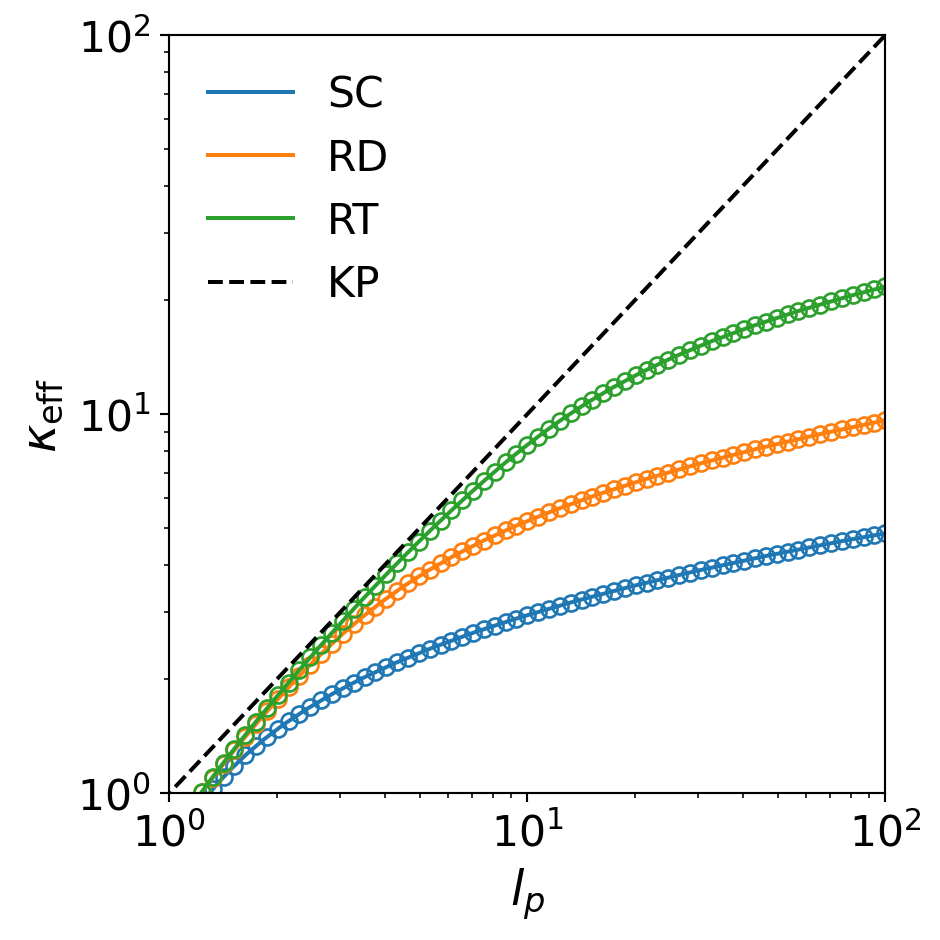

In [97]:
## provide lp/lb, evaluate the required kappa
from f_chain import grid_coords
fig = plt.figure(figsize=(5, 5),dpi=192)

c_list = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5']
ax2 = fig.add_subplot(1,1,1)
labels = ['SC','RD','RT']
for i, grid in enumerate(['SC','RB','RT']):
    r_n, r_opp = grid_coords(grid)
    cos_i1 = r_n@r_n[0].T
    theta_i1 = np.arccos(cos_i1)

    def f_average(x, kappa):
        # x(theta) is a fumction of theta
        x_ave = np.sum(x*np.exp(-kappa/2*theta_i1**2))/np.sum(np.exp(-kappa/2*theta_i1**2))
        return x_ave

    def f_average_nonrev(x, kappa):
        # x(theta) is a fumction of theta
        x_ave = np.sum((x*np.exp(-kappa/2*theta_i1**2))[cos_i1>-1])/np.sum(np.exp(-kappa/2*theta_i1**2)[cos_i1>-1])
        return x_ave

    kappa_list = np.logspace(-2,2,100)
    cos_ave = np.array([f_average_nonrev(cos_i1, k) for k in kappa_list])
    lp_ave = -1/np.log(cos_ave)
    i_finite = np.isfinite(lp_ave)

    l_p_list = np.logspace(-1,2,100)
    kappa_eff_list = [kappa_eff(l, grid, nonreverse=True) for l in l_p_list]

    ax2.plot(lp_ave[i_finite], kappa_list[i_finite], label = labels[i], color=c_list[i])
    ax2.plot(l_p_list, kappa_eff_list, 'o', mfc='none', color=c_list[i])
    
    ax2.set_ylabel(r'$\kappa_{\rm{eff}}$',fontsize=18)
    ax2.set_xlabel(r'$l_p$',fontsize=18)
    ax2.set_yscale('log')
    ax2.set_xscale('log')
    ax2.set_ylim([1,100])
    ax2.set_xlim([1,100])
    ax2.tick_params(axis='both', which='major', labelsize=16)

ax2.plot(kappa_list, kappa_list, '--k', label = 'KP')
ax2.legend(fontsize=16, frameon=False)

plt.tight_layout()